8
(700, 9)
Initial value of cost function : 0.17142857142857143
J : 0.17076906700875616
J : 0.17011497085878502
J : 0.16946623181124645
J : 0.1688227992429951
J : 0.16818462306888854
J : 0.16755165373560016
J : 0.16692384221550602
J : 0.16630114000064583
J : 0.16568349909675625
J : 0.16507087201737608
J : 0.1644632117780224
J : 0.1638604718904368
J : 0.1632626063569006
J : 0.16266956966461857
J : 0.16208131678017004
J : 0.1614978031440266
J : 0.16091898466513577
J : 0.16034481771556955
J : 0.15977525912523724
J : 0.1592102661766616
J : 0.1586497965998178
J : 0.158093808567034
J : 0.15754226068795332
J : 0.15699511200455593
J : 0.15645232198624073
J : 0.1559138505249662
J : 0.15537965793044894
J : 0.15484970492542016
J : 0.1543239526409384
J : 0.15380236261175861
J : 0.15328489677175655
J : 0.15277151744940745
J : 0.15226218736331942
J : 0.15175686961781928
J : 0.15125552769859182
J : 0.1507581254683706
J : 0.15026462716268038
J : 0.14977499738563013
J : 0.14928920110575641
J : 0.148807

J : 0.08330674038240354
J : 0.08328304861342736
J : 0.08325949260095085
J : 0.08323607152970482
J : 0.08321278458960843
J : 0.0831896309757335
J : 0.08316660988826878
J : 0.08314372053248469
J : 0.08312096211869821
J : 0.08309833386223821
J : 0.0830758349834108
J : 0.08305346470746518
J : 0.08303122226455963
J : 0.08300910688972778
J : 0.08298711782284515
J : 0.08296525430859598
J : 0.08294351559644024
J : 0.08292190094058094
J : 0.08290040959993165
J : 0.08287904083808444
J : 0.0828577939232777
J : 0.08283666812836465
J : 0.08281566273078174
J : 0.08279477701251747
J : 0.08277401026008137
J : 0.08275336176447329
J : 0.0827328308211528
J : 0.08271241673000904
J : 0.08269211879533044
J : 0.0826719363257751
J : 0.0826518686343411
J : 0.08263191503833704
J : 0.082612074859353
J : 0.08259234742323149
J : 0.08257273206003882
J : 0.08255322810403647
J : 0.08253383489365292
J : 0.08251455177145549
J : 0.08249537808412247
J : 0.08247631318241545
J : 0.08245735642115191
J : 0.08243850715917787


J : 0.07925070024417546
J : 0.07924938284442436
J : 0.07924807197633028
J : 0.07924676760526661
J : 0.07924546969679848
J : 0.07924417821668175
J : 0.07924289313086202
J : 0.0792416144054734
J : 0.0792403420068375
J : 0.07923907590146234
J : 0.07923781605604131
J : 0.07923656243745214
J : 0.07923531501275574
J : 0.07923407374919525
J : 0.079232838614195
J : 0.0792316095753594
J : 0.07923038660047198
J : 0.07922916965749435
J : 0.07922795871456521
J : 0.07922675373999927
J : 0.0792255547022863
J : 0.07922436157009016
J : 0.07922317431224771
J : 0.07922199289776795
J : 0.0792208172958309
J : 0.07921964747578676
J : 0.07921848340715486
J : 0.0792173250596227
J : 0.07921617240304503
J : 0.07921502540744285
J : 0.07921388404300253
J : 0.0792127482800748
J : 0.07921161808917383
J : 0.07921049344097635
J : 0.07920937430632068
J : 0.07920826065620576
J : 0.07920715246179039
J : 0.07920604969439214
J : 0.07920495232548662
J : 0.07920386032670639
J : 0.07920277366984026
J : 0.07920169232683227
J

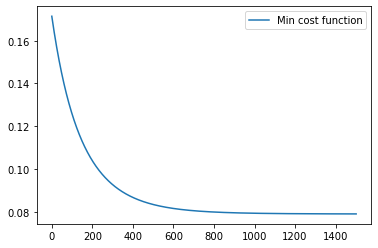

[[ 0.34191795  0.07165958  0.17368901 -0.04318205  0.00186893 -0.00762017
   0.1064044   0.0459472   0.02758583]]


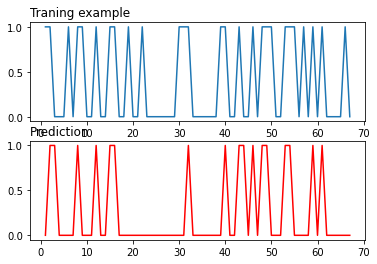

Accuracy : 79.1044776119403 %


In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Function to normalize features, you can also using sklearn to preprocessing data

def normalize_features(X):
    X_trans = X.T
    #Number of features
    n = X_trans.shape[0]
    print(n)
    for i in range(n):
        mean_value = np.mean(X_trans[i, :])
        std_value = np.std(X_trans[i, :])
        X_trans[i, :] = np.array([(x-mean_value) / std_value for x in X_trans[i, :]])
    return X_trans.T

def compute_cost_function(X, y, theta):
    #Number of training example
    m = X.shape[0]
    #Number of features+1 (include X0 column)
    n = X.shape[1]
    return 1/(2*m) * np.sum((X.dot(theta.T)-y)**2)

def batch_gradient_descent(X, y, learning_rate, epochs):
    #Number of training example
    m = X.shape[0]
    #Number of features
    n = X.shape[1]
    #Variable for learning loop
    iter = 0
    converged = False
    #Init value for coefficient
    theta = np.zeros(n).reshape(1,-1)
    #Compute initial value of cost function
    J = compute_cost_function(X, y, theta)
    print('Initial value of cost function :',J)
    #For plot
    min_J = [J]
    previous_J = J
    while not converged:
        grad = np.array([ np.sum((X.dot(theta.T) -y)*(X[:,j].reshape(-1, 1))) for j in range(n)])
        theta = theta - 1/m*learning_rate*grad
        J = compute_cost_function(X, y, theta)
        print('J :',J)
        if J>=previous_J or J<=0.001 or iter == epochs:
            converged = True
            print('Converged !')
        iter += 1
        previous_J = J
        min_J.append(J)
    plt.plot(min_J, label='Min cost function')
    plt.legend()
    plt.show()
    return theta

if __name__=='__main__':
    data = pd.read_csv('C:/CNTT/DATA/PimaDataset/Pima.txt')
    features = np.array(data.iloc[:, 0: 8]).reshape(-1, 8)
    outcome = np.array(data.iloc[:, 8]).reshape(-1, 1)
    features = normalize_features(features)
    X0 = np.ones(features.shape[0]).reshape(-1, 1)
    features = np.column_stack((X0, features))
    X_train = features[0:700, :]
    X_test = features[700:, :]
    y_train = outcome[0:700, :]
    y_test = outcome[700:, :]
    print(X_train.shape)
    theta = batch_gradient_descent(X_train, y_train, 0.003, 1500)
    print(theta)
    predict_y = X_test.dot(theta.T)
    predict_y = np.array([(lambda x: 1 if x >=0.5 else 0)(x) for x in predict_y]).reshape(-1, 1)
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
    ax1.plot(np.arange(1, 68), y_test)
    ax2.plot(np.arange(1, 68), predict_y, color='red')
    ax1.set_title('Traning example', loc='left')
    ax2.set_title('Prediction', loc='left')
    plt.show()
    #Check accuracy with 67 last training example
    cnt = 67 - np.sum(np.abs(y_test - predict_y))
    print('Accuracy :',cnt/67*100,'%')